# 1. Introduction

## 1.1 Task aims
As the final assignment of the Sprint I have to analyse the Coursera Course
Dataset and apply Data Visualization & Data Analysis to complete this task.

## 1.2 Objectives 
Practice working with data from Kaggle. 
Practice performing basic EDA. 
Practice visualizing data with Matplotlib & Seaborn. 
Practice reading data, performing queries and filtering data using Pandas.


## 1.3 Tasks
Download the data from Coursera Course Dataset. 
Load the data using Pandas. 
Perform data cleaning. 
Perform exploratory data analysis. 
Provide clear explanations in your notebook. 
Your explanations should inform the reader what you are trying to achieve, what results did you get, and what these results mean. Provide suggestions about how your analysis can be improved.

## 1.4 Assessment criteria
Adherence to the requirements. 
How well did you meet the requirements? Visualization quality. 
Did you use charts effectively to visualize patterns in the data? 
Are your visualizations properly labeled? 
Did you use colors effectively? 
Did you adhere to the principle of proportional ink? 
Code quality. 
Was your code well-structured? 
Did you use the appropriate levels of abstraction? 
Did you remove commented out and unused code? 
Did you adhere to the PEP8? Code performance. 
Did you use the suitable algorithms and data structures to solve the problems?


# 2. Required Modules

In [1]:
import numpy as np
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 
from wordcloud import WordCloud, STOPWORDS

/kaggle/input/cousera/Coursea_data.csv


##  2.1 Download Data from Coursera Course Dataset
Go to the Kaggle website or the direct link provided by your course to download the Coursera Course Dataset.
- Look for a "Download" button or link, usually found on the dataset page.
- Click the button and wait for the download to complete. 
- The dataset will typically be in a compressed format (like .zip).


## 2.2 Unzip the dataset if it's in a compressed format.

## 2.5 Use Pandas to load the data.

In [2]:
df=pd.read_csv('/kaggle/input/cousera/Coursea_data.csv')

## 2.6 Check the first few rows of the dataframe to ensure it's loaded correctly

In [3]:
df.head()

,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


In [4]:
df.tail()

,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
886,236,Программирование на Python,Mail.Ru Group,SPECIALIZATION,4.5,Intermediate,52k
887,883,Психолингвистика (Psycholinguistics),Saint Petersburg State University,COURSE,4.8,Mixed,21k
888,545,Разработка интерфейсов: вёрстка и JavaScript,E-Learning Development Fund,SPECIALIZATION,4.5,Intermediate,30k
889,875,Русский как иностранный,Saint Petersburg State University,SPECIALIZATION,4.6,Intermediate,9.8k
890,163,Финансовые инструменты для частного инвестора,National Research University Higher School of ...,SPECIALIZATION,4.7,Beginner,38k


## 3. Perform Data Cleaning
## 3.1 Identify missing or null values:


In [5]:
df.isnull().any()

Unnamed: 0                  False
course_title                False
course_organization         False
course_Certificate_type     False
course_rating               False
course_difficulty           False
course_students_enrolled    False
dtype: bool

**Key fundings:** No missing values

## 4.1 Initial  data exploration

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                891 non-null    int64  
 1   course_title              891 non-null    object 
 2   course_organization       891 non-null    object 
 3   course_Certificate_type   891 non-null    object 
 4   course_rating             891 non-null    float64
 5   course_difficulty         891 non-null    object 
 6   course_students_enrolled  891 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 48.9+ KB


To do some visualizations, firstly we need to select parameters, which we can visualize, and modify it as we need:

*  **Changing categorical data info numerical.**

In [7]:
def split_columns(data):
    categorical_col = data.select_dtypes(include=['object','category']).columns.tolist()
    numerical_col = data.select_dtypes(include=['int64','float64']).columns.tolist()
    return categorical_col,numerical_col

*** Type objects with"k" or "m"**
As we can see that the column course_students_enrolled is of the type object. That is due to the "k" or "m" after the number. We need to deal with that before starting any analysis

In [8]:
# change course_students_enrolled values like: 53k into 53,000

df['course_students_enrolled'] = df['course_students_enrolled'].str.replace('k', '*1000')
df['course_students_enrolled'] = df['course_students_enrolled'].str.replace('m', '*1000000')
df['course_students_enrolled'] = df['course_students_enrolled'].map(lambda x: eval(x))
df['course_students_enrolled']

0        5300.0
1       17000.0
2      130000.0
3       91000.0
4      320000.0
         ...   
886     52000.0
887     21000.0
888     30000.0
889      9800.0
890     38000.0
Name: course_students_enrolled, Length: 891, dtype: float64

In [9]:
df.describe()

,Unnamed: 0,course_rating,course_students_enrolled
count,891.000000,891.000000,8.910000e+02
mean,445.000000,4.677329,9.055208e+04
std,257.353842,0.162225,1.819365e+05
min,0.000000,3.300000,1.500000e+03
25%,222.500000,4.600000,1.750000e+04
50%,445.000000,4.700000,4.200000e+04
75%,667.500000,4.800000,9.950000e+04
max,890.000000,5.000000,3.200000e+06


**Key Finding:** Mean course rating is 4.677329. Quite high, as the rating can be given from 0-5. Minimum is 3.3, highest is 5 - proves so.

In [10]:
df.max()

Unnamed: 0                                                            890
course_title                Финансовые инструменты для частного инвестора
course_organization                             École des Ponts ParisTech
course_Certificate_type                                    SPECIALIZATION
course_rating                                                         5.0
course_difficulty                                                   Mixed
course_students_enrolled                                        3200000.0
dtype: object

In [11]:
df.min()

Unnamed: 0                                                                  0
course_title                (ISC)² Systems Security Certified Practitioner...
course_organization                                                    (ISC)²
course_Certificate_type                                                COURSE
course_rating                                                             3.3
course_difficulty                                                    Advanced
course_students_enrolled                                               1500.0
dtype: object

# 5 Data Visualizing
Data is transformated as we need. Now we can make visualizations. 

**Visualisation standards**

In [12]:
plt.style.use('ggplot')
font_title={'fontfamily':'monospace','fontweight':'bold','fontsize':20}
font_label={'fontfamily':'monospace', 'fontsize':12}

# 5.1 Course specialization analysis

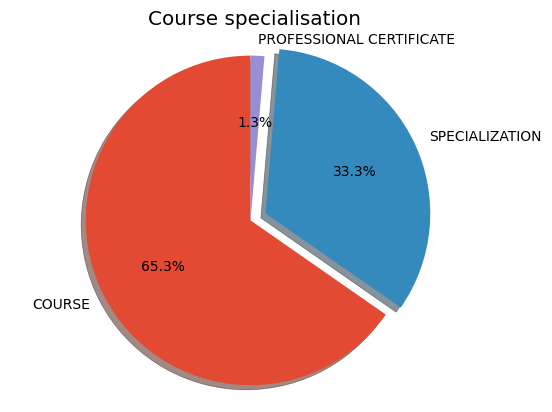

In [13]:
df1=df['course_Certificate_type'].value_counts()
data=['COURSE','SPECIALIZATION','PROFESSIONAL CERTIFICATE'] 
explode = (0, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
fig1, ax1 = plt.subplots()
ax1.pie(df1, explode=explode, labels=data, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal') 
plt.title('Course specialisation ')
plt.show()

**Key Findings:** 
* Most of the people are enrolled in 'COURSE'- 65%,  type courses and 33.3% people enrolled in 'SPECIALIZATION' courses 
* Too limited data for Proffessional certificate and Specialisation to provide further analysis.

## 5.2  Course rating 

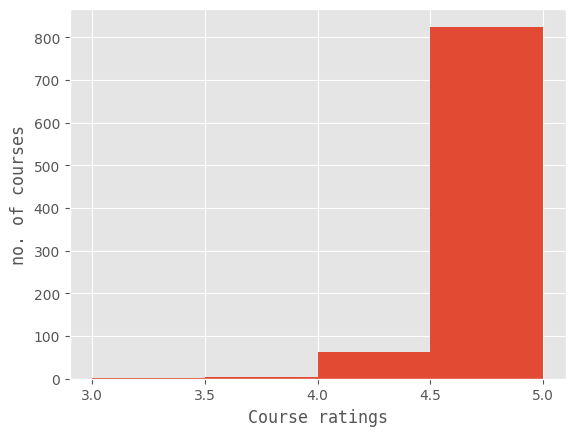

In [14]:
bins = [3.0, 3.5, 4.0, 4.5, 5.0]
plt.hist(df['course_rating'], bins)
plt.xticks(bins)

plt.xlabel("Course ratings", fontdict=font_label)
plt.ylabel("no. of courses", fontdict =font_label)

plt.show()

**Key findings:** Most of the coureses are very high quality, above 4.5

## 5.3 Top 10 course organisation analysis

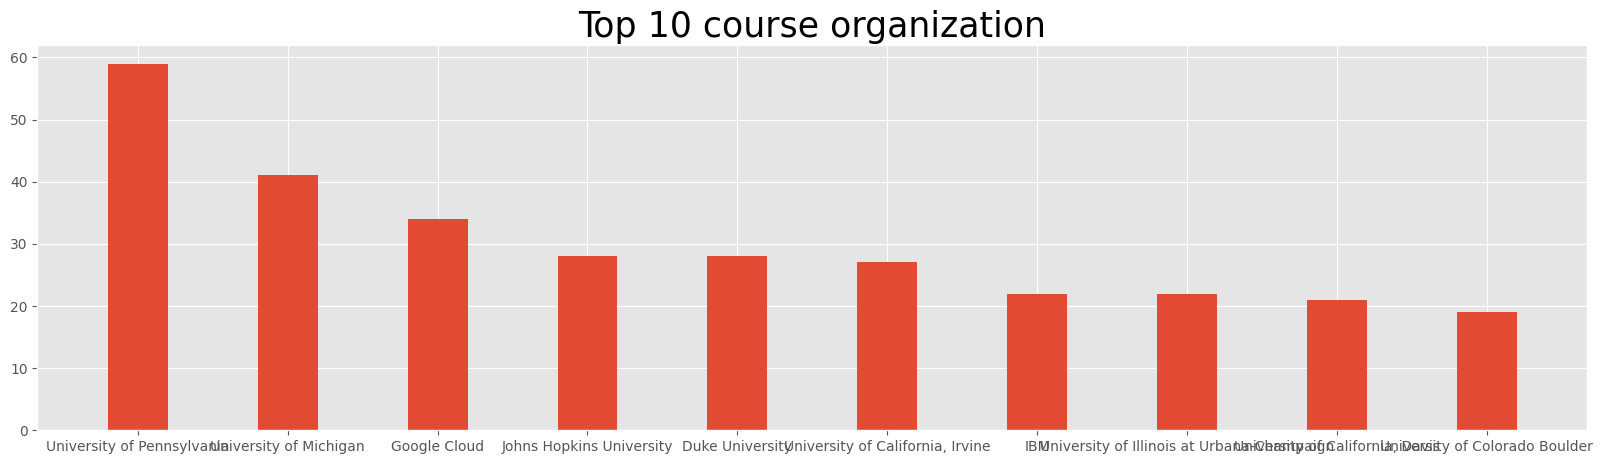

In [15]:

fig = plt.figure(figsize=(20,5), facecolor='white')

y = list(df['course_organization'].value_counts()[0:10])
x = list(df['course_organization'].value_counts().index[0:10])

plt.bar(x=x, height=y, width=.4)
plt.title('Top 10 course organization', fontdict={'fontsize': 25})

plt.show()

**Key findings**: The University of Pennsylvania & Michigan and Google Cloud organise the highest no of courses.

# 5.4 Ranking distribution per course type

Text(0.5, 1.0, '\nRating distribution per course type : Combined\n')

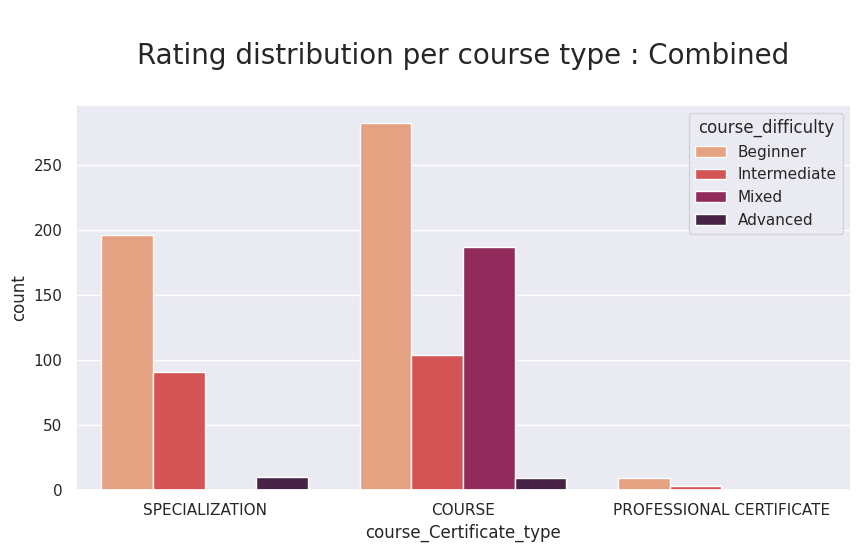

In [16]:
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.countplot(hue="course_difficulty", x="course_Certificate_type", data=df,palette="rocket_r")
ax.axes.set_title("\nRating distribution per course type : Combined\n",fontsize=20)

**Key fundings:** 
1. Only Courses have been created on all levels ( B, I, M. A)
2. No Proffessional Certifications for Advanced and Mixed  users - potential market niche to be addressed
3. No mixed courses for Specialisation - areas which might be addressed

# 5.5 Course difficulty

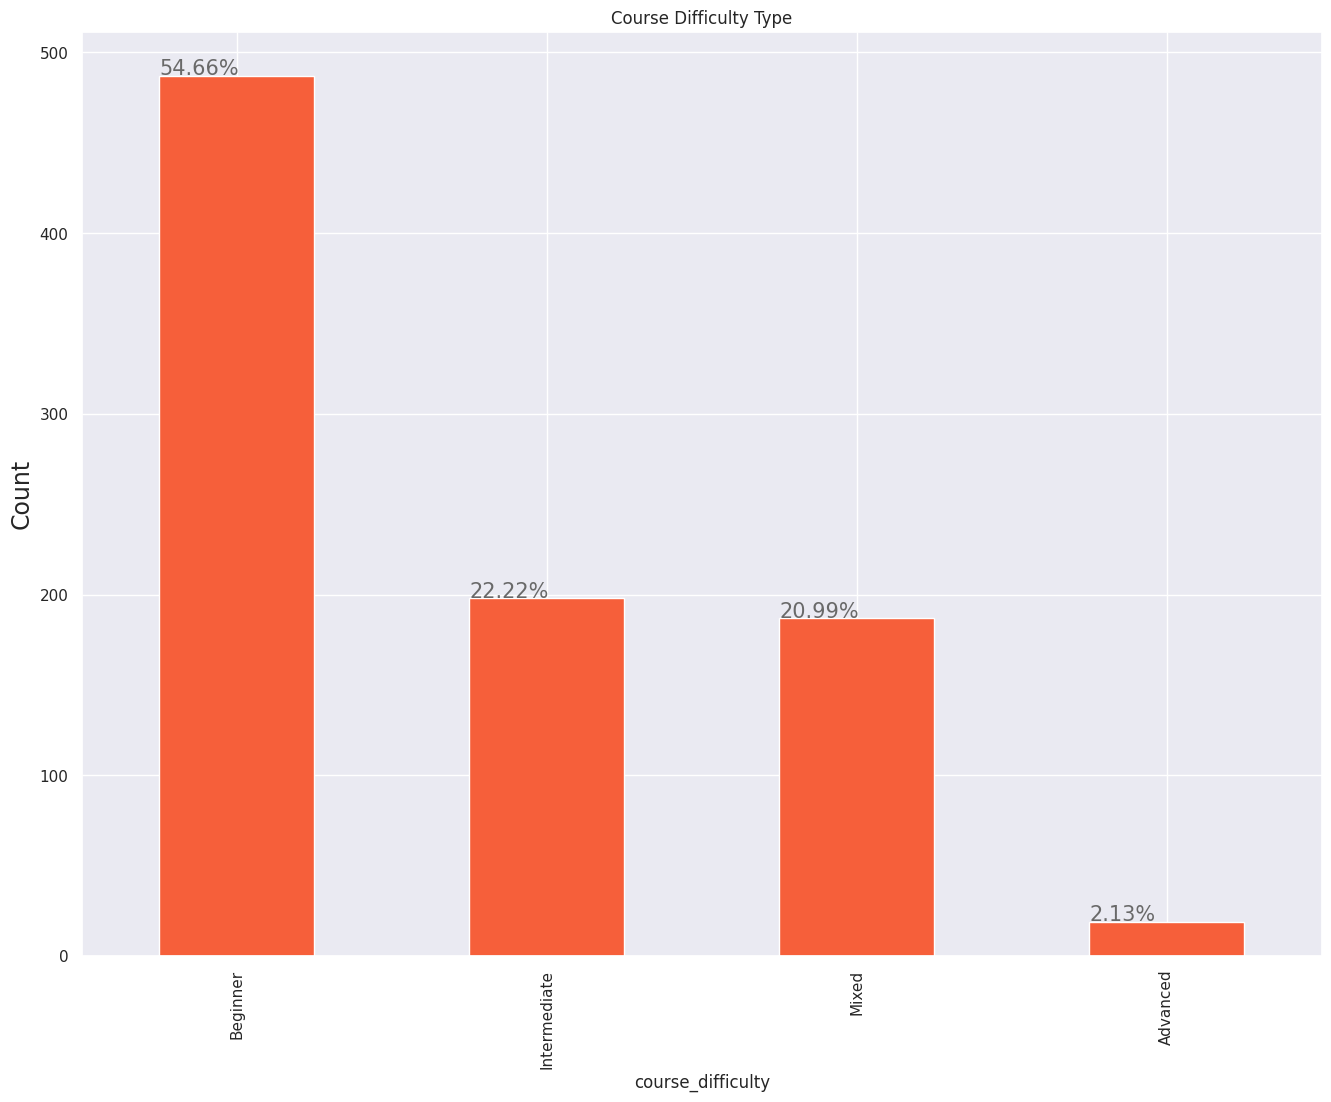

In [17]:
ax = df['course_difficulty'].value_counts().plot(kind='bar', figsize=(16,12),
                                                color="#F65F3A")
ax.set_alpha(0.8)
ax.set_title("Course Difficulty Type");
ax.set_ylabel('Count',fontsize=17);
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x(), i.get_height()+.5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='dimgrey')

**Key finding **: 55% of all students are bigginers

# 5.5  TOP courses 

In [18]:
top_10_courses = df.loc[:,['course_title', 'course_students_enrolled']]
top_10_courses = top_10_courses.sort_values(by=['course_students_enrolled'], ascending=False)
top_10_courses = top_10_courses.head(10)
top_10_courses

,course_title,course_students_enrolled
564,Machine Learning,3200000.0
815,The Science of Well-Being,2500000.0
688,Python for Everybody,1500000.0
674,Programming for Everybody (Getting Started wit...,1300000.0
196,Data Science,830000.0
129,Career Success,790000.0
261,English for Career Development,760000.0
765,Successful Negotiation: Essential Strategies a...,750000.0
199,Data Science: Foundations using R,740000.0
211,Deep Learning,690000.0


**Key Funding:** ML is among the most popular courses.

# 5.6 Courses and organisations analysis

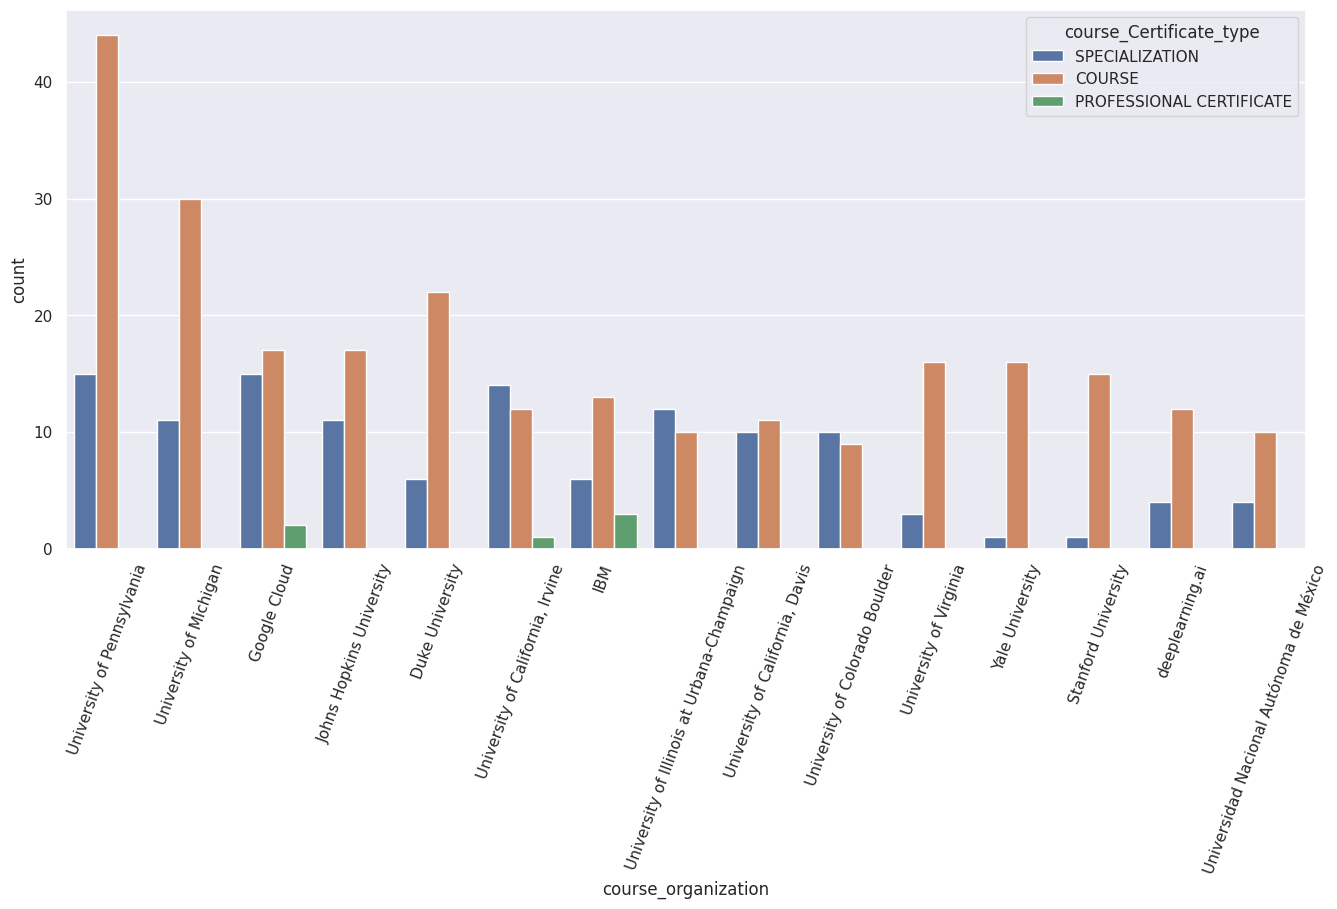

In [19]:
plt.figure(figsize=(16,7))
sns.countplot(x = 'course_organization' , data=df , order=df['course_organization'].value_counts().iloc[:15].index , hue='course_Certificate_type')
plt.xticks(rotation=70)
plt.show()

* ***Key fundings:
* Limited no of organisation (i.e. i.e. Google,IBM, CU) have wide portfolio which include all courses types. Most organisations are highly specialised. 
* Courses are higher rated than specialisations; very limited organisations provide higher rated specialisations than courses i.e.California, Illinois, Colorado  University

# 5.7 Courses and rating analysis

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


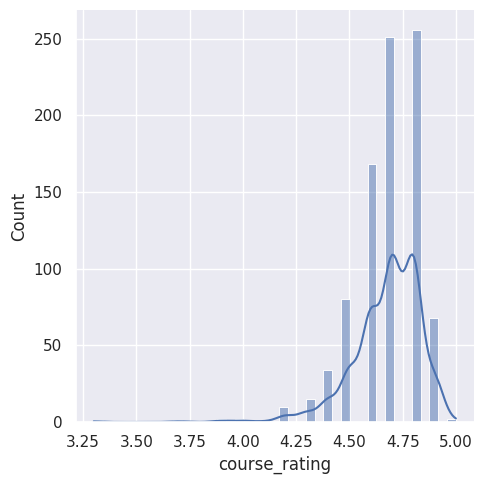

In [20]:
sns.displot(df.course_rating, kde=True)

**Key findings:** Course rating has normal distribution.  High ratings comparing to minimum and maximum

# 5.8 Correlation analysis

The correlation analysis between no of students enrolled and ratings. 

In [21]:
df_numeric = df.select_dtypes(include=[ 'float64', 'int64'])

In [22]:
cor = df_numeric.corr()

<Axes: >

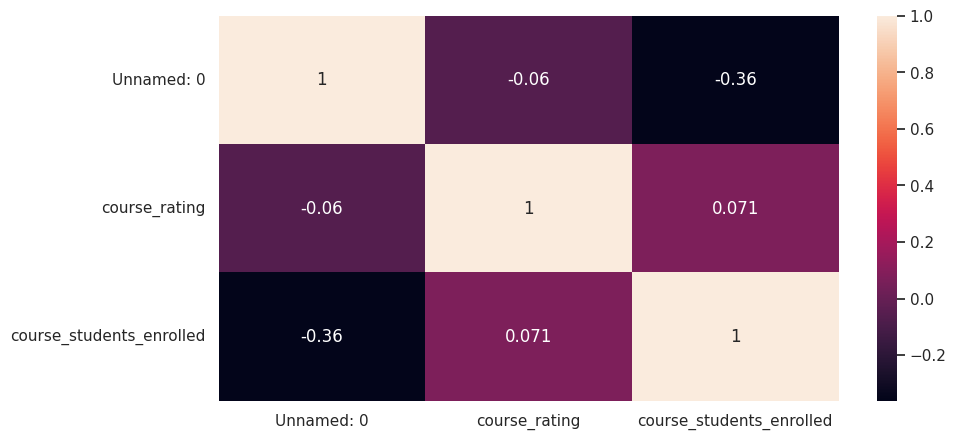

In [23]:
sns.heatmap(cor, annot=True)

**Key findings: ** There is no correlation between course rating and students enrolled

#  7. Key Findings and Insights

1. Average course rating is quite higher, compared to lowest and maximum value. So, the cours quality is being maintained.
2. Courses are higher rated than specialisations. 
3. There is normal distribution for course rating
4. No effective coorelation between course_students_enrolled, course rating per university.
5. No Proffessional Certifications for Advanced and Mixed  users - potential market niche to be addressed
6. No mixed courses for Specialisation - areas which might be addressed
7.  Limited no of organisation (i.e. i.e. Google,IBM, CU) have wide portfolio which include all courses types. Most organisations are highly specialised. 
8. Very limited organisations provide higher rated specialisations than courses i.e.California, Illinois, Colorado  University

# 8 Ideas for further analysis

1. Analyses of rating per course specialisations
2. Analysis of changes in time
3. Analysis per students segments (profession, age, gender, geolocation etc)
